Dataset Shape:  (569, 32)
         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  


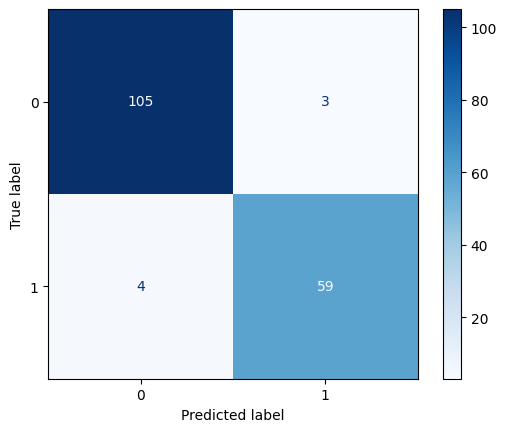

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score

# Load dataset
balance_data = pd.read_csv('data4.csv', sep=',', header=None)
print("Dataset Shape: ", balance_data.shape)

# Inspect data
print(balance_data.head())
print(balance_data.dtypes)

print("balance data before encoder",balance_data.iloc[:, 1])

 
# Separating the target variable (assuming target is in the second column, index 2)
X = balance_data.values[:, 2:]  # Features

# Convert continuous target variable to binary classes (if needed)
# Assuming target column is continuous and needs binarization
Y = balance_data.values[:, 1]
 
   

 #Encoding the categorical data (assuming column index 2 is categorical)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(balance_data.iloc[:, 1])
print("balance data after encoder",balance_data.iloc[:, 1])

 
 
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
 
print("#####",X_train[:5,:])
# Print the unique values in the training target variable
print("Unique values in y_train:", np.unique(y_train))

 #Creating the classifier object
model = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)

 #Performing training
model.fit(X_train, y_train)

 #Making predictions
y_pred = model.predict(X_test)

print("Predicted values:", y_pred)
for i in range(len(X_test)):
    print(X_test[i],y_test[i])
print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
print("Accuracy : ",
          accuracy_score(y_test, y_pred))
print("Report : ",
          classification_report(y_test, y_pred))
# Optionally, visualize the confusion matrix
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()
plt.show()

